In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Write your imports here

# Calculus Exercise
## Numerical Computation. Derivatives, integrals. Calculus in many dimensions

### Problem 1. Derivative and Slope at a Point
We'll warm up by visualizing how the derivative of a function relates to the slope of the function at a given point.

We can either calculate the derivative analytically (by hand) or use the numerical definition. So, let's see what a function and its derivative look like.

Write a Python function which plots a math function and its derivative.

In [32]:
def calculate_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    # TODO: Write your code here
    return (function(point + precision) - function(point))/precision

def plot_derivative(function, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function and its derivative. 
    The `derivative` parameter is optional and can be provided as a separate function.
    If it's not provided, the derivative will be calculated automatically
    """
    # We're using vectorized functions to make our code simpler: this only hides the for-loop,
    # it doesn't provide any performance gain
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    function_np = np.vectorize(function)
    y = function_np(x)
    
    dy = None
    if derivative is None:
        derivative_np = np.vectorize(calculate_derivative_at_point)
        dy = derivative_np(function, x)
    else:
        derivative_np = np.vectorize(derivative)
        dy = derivative_np(x)
    
    plt.plot(x, y, label = "Function")
    plt.plot(x, dy, label = "Derivative")
    
    plt.gca().set_aspect("equal")
    plt.legend()
    plt.show()
    
    # TODO: Plot the function and its derivative.
    # Don't forget to add axis labels.
    # Feel free to make the plot as pretty as you wish - you may add titles,
    # tick marks, legends, etc.

In [8]:
calculate_derivative_at_point(lambda x : x ** 2, 0) #no precision provided, the default one is used

9.999999999999998e-08

In [9]:
calculate_derivative_at_point(lambda x : x ** 2, 0, precision = 0.5) #big precision

0.5

In [10]:
calculate_derivative_at_point(lambda x : x ** 2, 0, precision = 1e-12) #very small precision

1e-12

In [13]:
calculate_derivative_at_point(lambda x : x ** 2, 1, precision = 1e-12) #The derivative is 2x

2.000177801164682

In [14]:
calculate_derivative_at_point(lambda x : np.sin(x), 0, precision = 1e-12) #The derivative is cos(x)

1.0

In [15]:
#Define calculate_derivative_at_point using the interval before 
def calculate_derivative_at_point_look_back(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    return (function(point) - function(point- precision))/precision

In [16]:
calculate_derivative_at_point_look_back(lambda x : x ** 2, 0) 

-9.999999999999998e-08

In [17]:
calculate_derivative_at_point_look_back(lambda x : x ** 2, 1, precision = 1e-12)

1.999955756559757

In [18]:
calculate_derivative_at_point_look_back(lambda x : np.sin(x), 0, precision = 1e-12)

1.0

In [23]:
#Define calculate_derivative_at_point using the double interval 
def calculate_derivative_at_point_double_interval(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    return (function(point+ precision) - function(point- precision))/(precision * 2)

In [24]:
calculate_derivative_at_point_double_interval(lambda x : x ** 2, 0) 

0.0

In [25]:
calculate_derivative_at_point_double_interval(lambda x : x ** 2, 1, precision = 1e-12)

2.0000667788622195

In [26]:
calculate_derivative_at_point_double_interval(lambda x : np.sin(x), 0, precision = 1e-12)

1.0

Let's now test with out favourite function: $y = x^2$ whose derivative is $y' = 2x$. If you've worked correctly, both of the following plots should be the same.

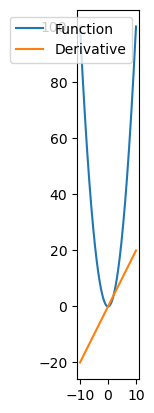

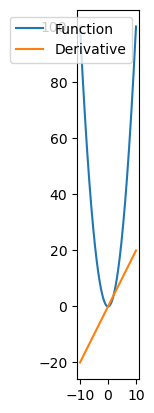

In [33]:
plot_derivative(lambda x: x ** 2, lambda x: 2 * x) # The derivative is calculated by hand
plot_derivative(lambda x: x ** 2) # The derivative is not pre-calculated, should be calculated inside the function

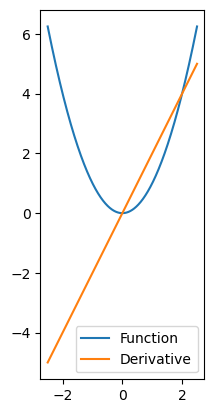

In [34]:
plot_derivative(lambda x: x ** 2, lambda x: 2 * x, -2.5, 2.5)

Let's try one more: $y = \sin(x)$, $y'= \cos(x)$.

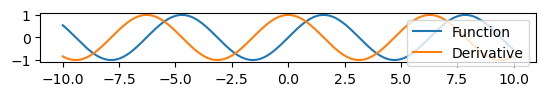

In [35]:
plot_derivative(np.sin)

These plots may look nice but they don't reflect the idea of **slope at a point** very well. Now that we're sure our functions are working, let's actually calculate the derivative at **one point** and see that it is, indeed, equal to the slope of the function at that point.

#### How to plot the tangent line?
We need to find the line equation first. 

We're given the derivative, which is equal to the slope of the line. In the line equation $y = ax + b$, the slope is $a$. We now have to find $b$. We're given a point $P(x_P; y_P)$ through which the line passes. Substitute $x_P$ and $y_P$:
$$ y_P = ax_P + b $$

$$ b = y_P - ax_P $$

Now that we have $a$ and $b$, we can plot the line given by $y = ax + b$. The parameter $b$ is sometimes called "y-intercept" (or "intercept").

Now we can copy the code from the previous function. This time, however, we won't plot the entire range, only one value of the derivative. We'll also show the point where we're calculating.

In [40]:
def plot_derivative_at_point(function, point, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function in the range [x_min; x_max]. Computes the tangent line to the function
    at the given point and also plots it
    """
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    y = vectorized_function(x)
    
    slope = 0 # Slope of the tangent line
    if derivative is None:
        slope = calculate_derivative_at_point(function, point)
    else:
        slope = derivative(point)
    
    intercept = function(point) - slope * point #equals b
    tangent_line_x = np.linspace(point - 2, point + 2, 10)
    tangent_line_y = slope * tangent_line_x + intercept
    plt.plot(x, y)
    plt.plot(tangent_line_x, tangent_line_y)

    plt.scatter(point, vectorized_function(point), color = 'r')
    plt.show()

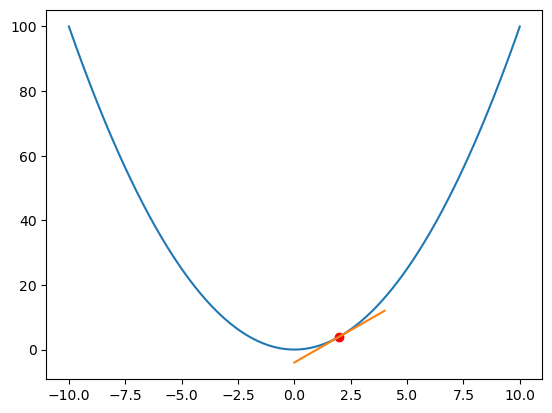

In [41]:
plot_derivative_at_point(lambda x: x ** 2, 2)

Looks like it! Let's zoom in to confirm:

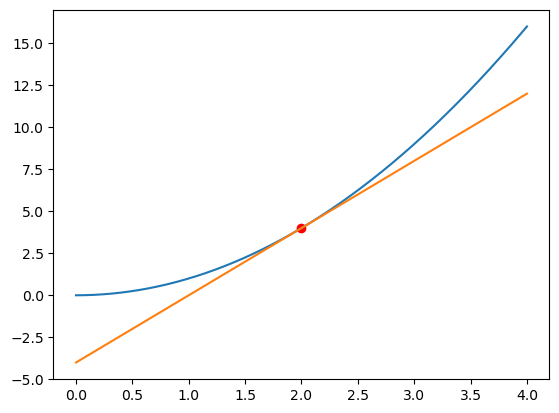

In [42]:
plot_derivative_at_point(lambda x: x ** 2, 2, min_x = 0, max_x = 4)

Let's also plot several tangents to the same function. Note that this will create many graphs by default. You can plot them all at once if you wish.

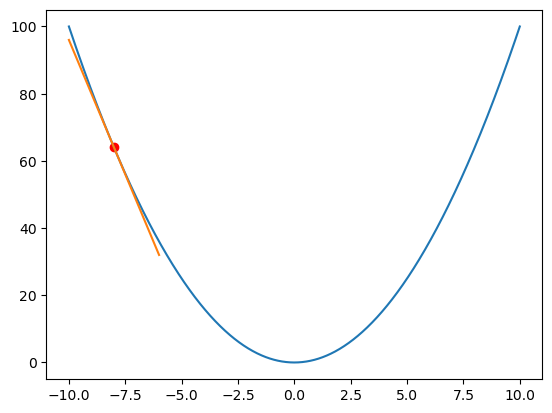

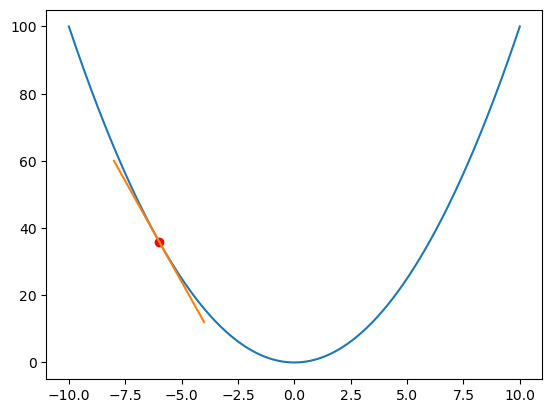

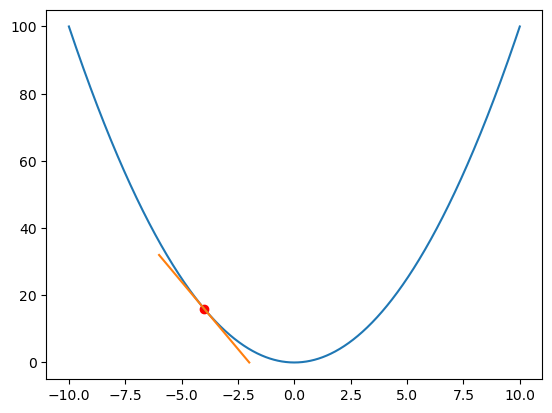

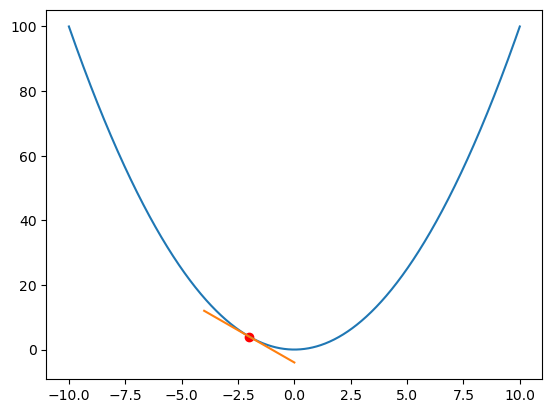

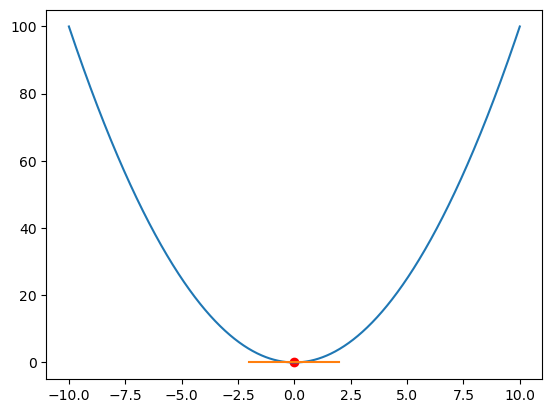

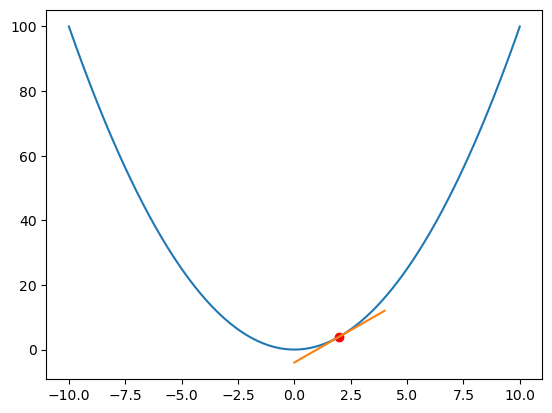

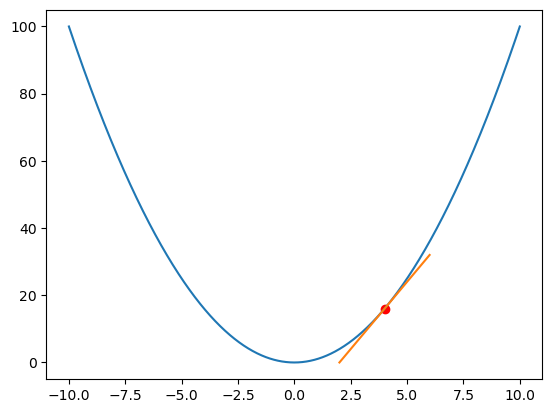

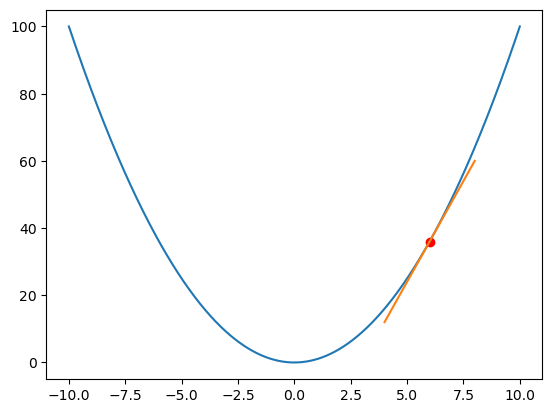

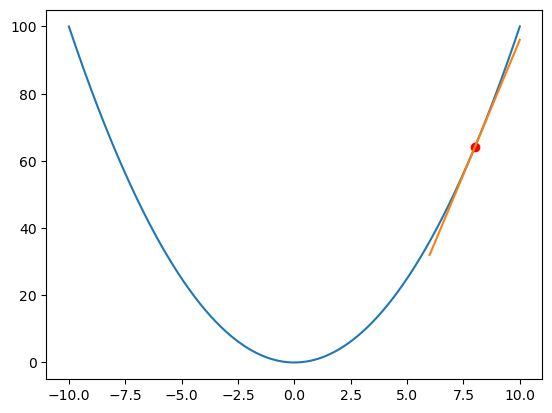

In [43]:
for x in np.arange(-8, 10, 2):
    plot_derivative_at_point(lambda x: x ** 2, x)

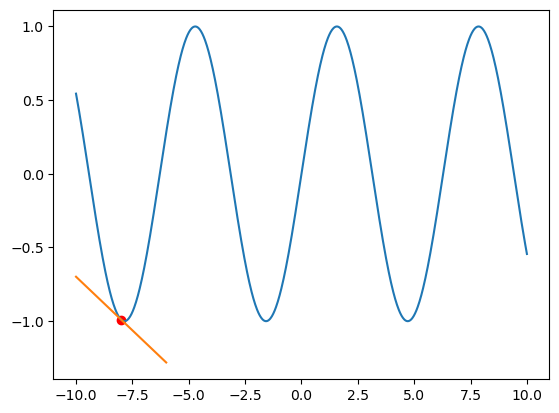

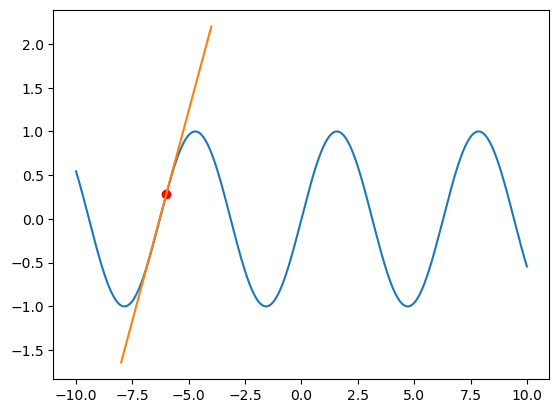

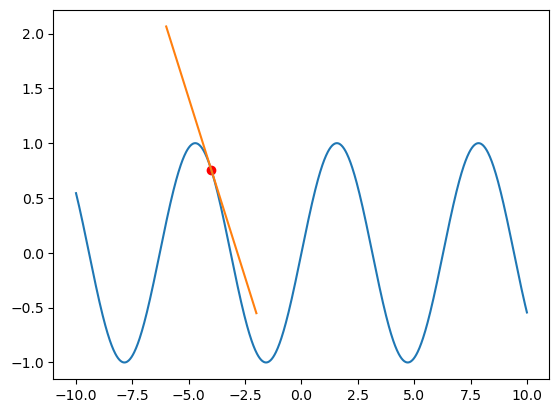

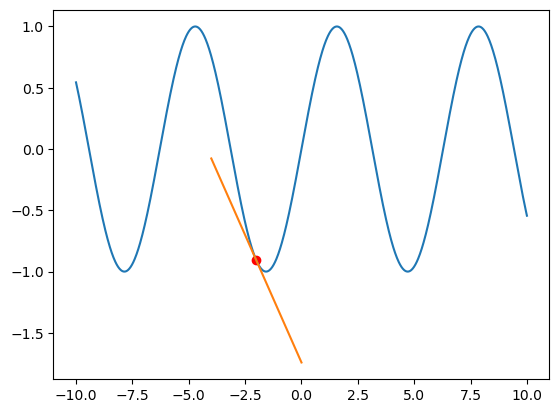

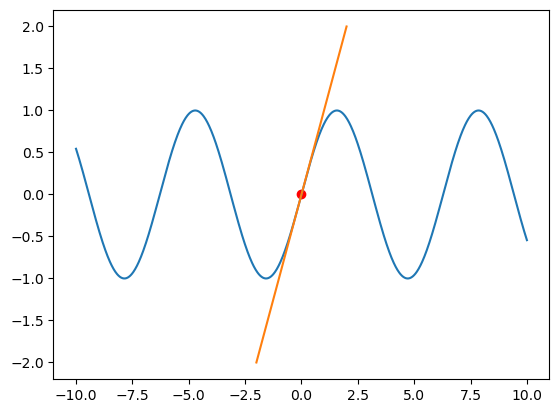

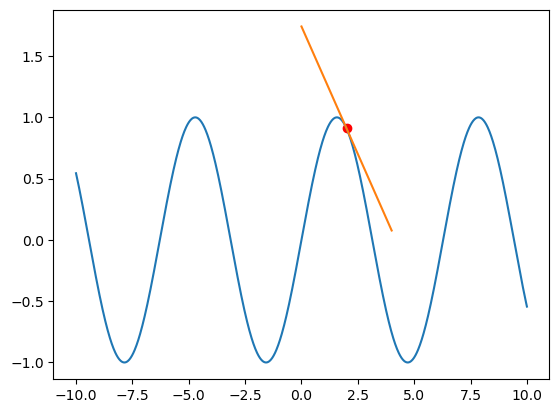

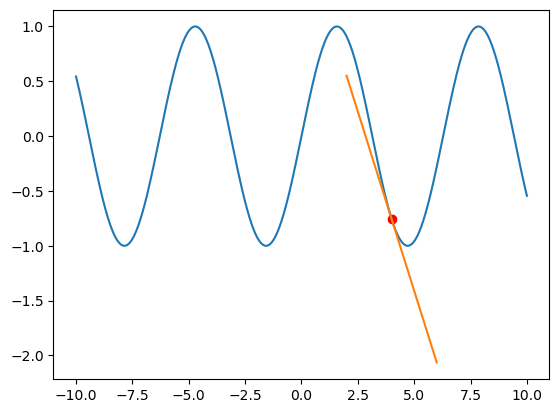

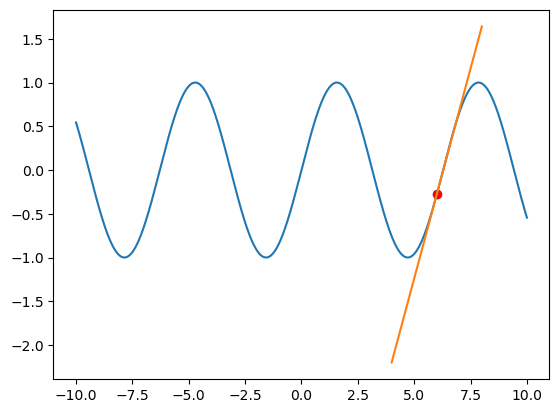

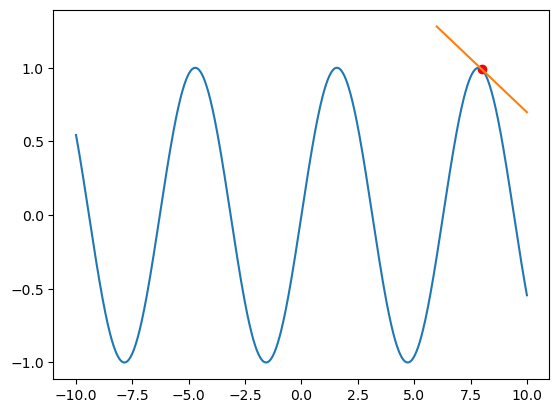

In [44]:
for x in np.arange(-8, 10, 2):
    plot_derivative_at_point(np.sin, x)

Now we have a visual proof that the derivative of a function at a given point is equal to the slope of the tangent line to the function.

### Problem 2. Limits. The Number $e$ as a Limit
We know what limits are, what they mean and how they relate to our tasks. Let's explore a special limit. This one arises from economics but we'll see it has applications throughout science because of its unique properties.

Imagine you're saving money in a bank. Every period, you accumulate [interest](https://en.wikipedia.org/wiki/Compound_interest) on your money. Let's say the bank is very generous and gives you **100% interest every year**.

How much money will you have after one year? Let's say you got $\$1$. After one year, you'll get your interest from the bank and you'll have $\$2$. Your money doubled, which was expected.

How about this offer: **50% interest every 6 months**? Will this be the same, better, or worse?
You start with $\$1$. After 6 months, you'll accumulate $50%$ interest to get $\$1,50$. After 6 more months, you'll get $50\%.1,50 = 0,75$, so your total is $2,25$. You got $\$0,25$ more!

Let's try to exploit the scheme and get rich.

**$100/12\%$ every month**
* January: $1 + 1/12$
* February: $(1 + 1/12) * (1 + 1/12)$
* March: $(1 + 1/12) * (1 + 1/12) * (1 + 1/12)$
* ...

We can see a pattern. Every period, we multiply our money by $1 + 1/12$. So, the final sum will be $$\$1.\left(1+\frac{1}{12}\right)^{12} = \$2,61$$

We did even better. This is always true. The more periods, the more money we accumulate. The more money we have, the more interest we accumulate. And that completes the vicious circle known as money saving :).

Let's try other options:

**$100/52\%$ every week**

$\$1.\left(1+\frac{1}{52}\right)^{52} = \$2,69$

**$100/31556926\%$ every second**

$\$1.\left(1+\frac{1}{31556926}\right)^{31556926} = \$2,718$

Well, there's a slight problem to our world domination plans. Even though we accumulate more and more money, we get *diminishing returns*. For 52 periods we got $2,69$, and for more than 3 million periods we only got like $\$0,02$ more. This pattern will continue.

Now we can ask ourselves, what is the maximum profit we can accumulate for a year? To do this, we can ask
$$ \lim_{n \ \rightarrow \infty}\left(1+\frac{1}{n}\right)^n = ? $$

It turns out this is a constant. It is approximately equal to $2,71828182\dots$. Since it's very useful, it's got a name: $e$, or Euler's number (sometimes called Napier's number). The limit above is **the definition of $e$**.

Why is it so useful? Let's go back to the original problem. In compound interest, the extra amount after every period is proportional to the amount at the start of the period. In other words, **the rate of change of a value is proportional to the value**. This pops out everywhere in nature and business. Some examples include radioactive decay (more atoms $\Rightarrow$ more decays), cooling down a cup of tea (the rate of cooling down depends on the temperature difference between the cup and the room), animal population models (more animals $\Rightarrow$ more babies), infection models, and so on.

To quickly verify the value of $e$, calculate the limit as we defined it above.

In [ ]:
def calculate_limit_at_infinity(function):
    """
    Calculates a numerical approximation of the limit of the specified function
    as its parameter goes to infinity
    """
    n = 10 ** np.arange(0, 10)
    return zip(n, function(n))

In [ ]:
limits = calculate_limit_at_infinity(lambda x: (1 + 1 / x) ** x)
for limit in limits:
    print(limit)

### Problem 3. Derivatives of Exponential Functions
Use the function you defined in the first problem to plot the derivative of $y = 2^x$.

In [ ]:
plot_derivative(lambda x: 2 ** x, min_x = 0, max_x = 10)

The function and its derivative look closely related, only the derivative seems to grow a bit slower than the function. Let's confirm that by looking at a broader range:

In [ ]:
plot_derivative(lambda x: 2 ** x, min_x = 0, max_x = 20)

The same pattern will continue if we try to plot any exponential function, e.g. $y = 3^x$, $y = 4^x$ and so on, if the base of the exponent is greater than 1. If we want to plot, say, $y = 0,5^x$, we'll get a slightly different result. Note that the functions look more or less the same, only their signs are flipped.

In [ ]:
plot_derivative(lambda x: 0.5 ** x)

Very interesting things happen if we plot $y = e^x$:

In [ ]:
plot_derivative(np.exp)

The plots overlap. You can see that this is true if you plot the function and its derivative with different line widths. This means that

$$ (e^x)' = e^x $$

Also:
$$ (e^x)'' = e^x $$
$$ (e^x)''' = e^x $$
... and so on. This is the only function whose rate of change (derivative) is equal to the function itself. This property makes it even more interesting for science and math.

Also, do you remember that $e^{i\varphi} = \cos(\varphi) + i\sin(\varphi)$? This constant never ceases to amaze.

### Problem 4. Integrals and Area. Changing Variables in Integration
We know that the definition of an integral is the area "between" the function we're integrating, and the x-axis. This gives us a method to calculate integrals. Most integrals can't be solved analytically but have numerical solutions. One such integral is 
$$\int\sin(x^2)dx$$

Note that we can only solve **definite integrals** numerically.

The simplest way to calculate the integral is to apply the definition, like in the case of the derivative. This is called [the trapezoid method](http://www.mathwords.com/t/trapezoid_rule.htm) because the area is approximated as a series of trapezoids.

Write a function which does exactly that. Use `numpy` and vectorization as much as possible.

In [ ]:
def calculate_integral(function, x_min, x_max, num_points = 5000):
    """
    Calculates a numerical approximation of the definite integral of the provided function
    between the points x_min and x_max.
    The parameter n specifies the number of points at which the integral will be calculated
    """
    # Write your code here
    pass

In [ ]:
print(calculate_integral(lambda x: x ** 2, 0, 1)) # Should be close to 0.333
print(calculate_integral(lambda x: np.sin(x ** 2), 0, 5)) # Should be close to 0.528

Let's apply our insight to finding the area of a circle. We know the equation of a circle is not a function (it's more like two functions). We can, however be clever. One way is to integrate both of the functions and add them together. Another way is to integrate one and double the area. 

**Note:** We're trying to find the total area of the circle, there is **no negative area** in this particular case.

Another, even more clever way is to look at a quarter of the circle. This is convenient because we may look at the quadrant where $x > 0$ and $y > 0$. So, we'll need to find the area between:
1. $x \ge 0$
2. $y \ge 0$
3. The circle $x^2 + y^2 \le R^2$ (let's fix the radius to be 1)

$\Rightarrow y = \sqrt{R^2 - x^2} = \sqrt{1 - x^2}$

After all of this, we'll need to multiply the result by 4.

$$ S = 4 \int_0^1\sqrt{1 - x^2}dx $$

In [ ]:
circle_piece_area = calculate_integral(lambda x: np.sqrt(1 - x ** 2), 0, 1)
total_area = 4 * circle_piece_area
print(total_area)

And we got a value close to $\pi$, which is the real answer.

#### * Optional: Integration in polar coordinates
We can, however, do better. We know that a circle looks much simpler in polar coordinates. Let's now change our viewpoint.

In polar coordinates $(r, \varphi)$, the equation of a circle is

$$ r = R $$

which is our case simplifies to $r = 1$. Note there's no dependence on $\theta$: the radius is the same regardless of the angle. The boundaries for $\theta$ are every possible angle from $0$ to $2\pi$ radians. For $r$, we have $r \ge 0$ and $r \le R$. This translates to the integral:

$$ S = \int_{\theta=0}^{2\pi}\int_{r=0}^R r dr d\theta $$

**Note:** We usually don't write the variables at the bottom of the integral symbol. I've done this just for clarity.

I won't go into details but since there's no dependence on $\theta$, we can simply "separate the integrals" and multiply 
them.

$$ S = \int_{0}^{2\pi}d\theta .\int_{r=0}^R r dr $$

The first one is:
$$ I_1 = \int_0^R r dr = \left.\frac{r^2}{2}\right|_{0}^{R} = \frac{R^2}{2} - \frac{0^2}{2} = \frac{R^2}{2} $$

And the second one is:
$$ I_2 = \int_0^{2\pi}1d\theta = \left.\theta\right|_0^{2\pi} = 2\pi - 0 = 2\pi $$

$$ \Rightarrow  S = I_1I_2 = 2\pi\frac{R^2}{2} = \pi R^2$$

$$ S = \pi R^2$$

### * Problem 5. Taylor Series. Computing Function Value Approximations
Some functions can be really hard to compute, or even impossible. However, there are ways to approximate functions with other functions, which are simpler. The idea is the same as what we already used: we approximated the function with its tangent line to find the derivative at a given point. Research what Taylor series are and how they're used in approximating functions. Derive and implement the Taylor expansions of several functions.
* What is "function approximation"?
* Why can't we compute all functions numerically?
* What are some easy ways to approximate a function near a given point?
* Polynomial functions are very useful approximators. Why? Think about their continuity and derivatives
* What information does the first derivative of a function give us?
    * How does that information generalize to higher-order derivatives (second, third, fourth, etc.)?
* What are Taylor series? Why does it work?
    * Derive the formula
    * What are Maclaurin series? What's the difference?
* Derive some Taylor series expansions. Some common functions are $\sin(x)$ and $\cos(x)$
    * To work with infinite sums, we have to "cut" them somewhere. Why are we allowed to do that? Think about the different terms: one Taylor expansion term doesn't affect the others
    * How are those expansions used in calculators / numerical libraries?
    * Write the code that computes the approximations
    * Test the code
* How many terms do we need?
    * Visualize how the approximation is getting better as we include more terms in the Taylor expansion
    

### ** 6. Calculus in Medical Data. Electrocardiography (EKG)
EKG data is basically a 1-dimensional function of time. It records electrical impulses which depend on the state of the heart. How can we analyze EKG data?
* What is EKG data? What is the physical process and what is its interpretation?
    * Provide several EKG plots
    * What are the main parts of an EKG?
* How does the concept of local extrema relate to EKG?
* How does the concept of "convex" / "concave" graphs relate to EKG?

You can take various paths witk EKG data. Some companies, Samsung for example, use a heart rate sensor to measure stress and blood oxygen levels. An algorithm takes data for several seconds or minutes and analyzes it in several ways.
* Optional: Research how you can use EKG or pulse sensor data to measure oxygen in the blood. Have a look [here](https://www.quora.com/How-do-optical-heart-rate-sensors-work) for example
* Optional: How can you use the pulse sensor data to measure stress levels? There are many approaches to this one.
* Optional: Many diseases can be diagnosed from EKG data. Can you train an algorithm to recognize a certain disease? This is related to *time series* analysis

### ** 7. Physics Engine
Use your knowledge of vectors, algebra and calculus to create a physics engine. You can use this for many things. One example is computer games. Another example is computer simulation.

Don't forget to provide details about your calculations and implementations. 
* Implement vectors and operations
* Implement visualization
* Implement Newtonian mechanics with forces as vectors acting on material points
* Implement another physical process: e.g. collision detection. This should take into account momentum and the law of conservation of momentum
    * You can also implement other physical phenomena (e.g. heat transfer, reflection of light, etc.), as you need.